In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install dependencies: 
!pip install pyyaml==5.1
!pip install torch==1.7
!pip install torchvision==0.8.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch

     |████████████████████████████████| 276kB 9.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=9ccd89b1f870b4bcf1c56767e6a9fc6788458d0e0bc4a54e052b4aec197649fb
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.7.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
     |████████████████████████████████| 12.7MB 179kB/s 
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling tor

In [3]:
torch.__version__

'1.7.0'

In [4]:
import torch, torchvision
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.0MB 5.4MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=1d8df91c98f3a7b55282ed0567bafcf85f2460e484d70021dc7318ea915202ca
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built fvcore


In [5]:
!sudo apt install tesseract-ocr 
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,913 kB/s)
debconf: unable to initi

In [6]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

from detectron2.data import DatasetCatalog, MetadataCatalog

import pandas as pd

import os
import json

#from detectron2.structures import BoxMode

import itertools

import random

from google.colab.patches import cv2_imshow


#from detectron2.engine import DefaultTrainer

In [7]:
import drive.MyDrive.NLP_Praktikum.deskew as deskew
import drive.MyDrive.NLP_Praktikum.table_detection as table_detection
import drive.MyDrive.NLP_Praktikum.table_structure_recognition_all as tsra
import drive.MyDrive.NLP_Praktikum.table_structure_recognition_lines as tsrl
import drive.MyDrive.NLP_Praktikum.table_structure_recognition_wol as tsrwol
import drive.MyDrive.NLP_Praktikum.table_structure_recognition_lines_wol as tsrlwol
import drive.MyDrive.NLP_Praktikum.table_ocr as tocr
import drive.MyDrive.NLP_Praktikum.table_xml as txml

ORIGINAL IMAGE:


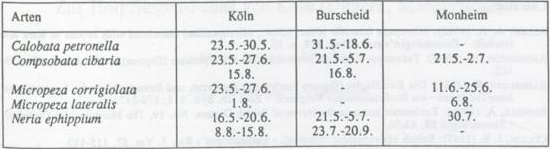


DESKEWED IMAGE:


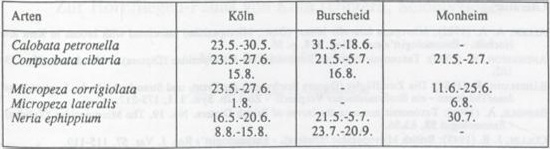

In [8]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('/content/drive/MyDrive/NLP_Praktikum/Table_Detection/All_X152/All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/NLP_Praktikum/Table_Detection/All_X152/model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

# path to the image scan of the document
file = "/content/drive/MyDrive/NLP_Praktikum/alens_tabelle.jfif" #'/content/drive/MyDrive/NLP_Praktikum/Table_Detection/All_X152/Sampled_Detection_data/Word/images/%20Edward%20Dawes%20paper_15.jpg' # '/content/drive/MyDrive/NLP_Praktikum/without_lines.jpg'  

# load the image from disk
original_image = cv2.imread(file)
deskewed_image = deskew.deskewImage(original_image)

print("ORIGINAL IMAGE:")
cv2_imshow(original_image)

print()

print("DESKEWED IMAGE:")
cv2_imshow(deskewed_image)

TABLE DETECTION:


/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


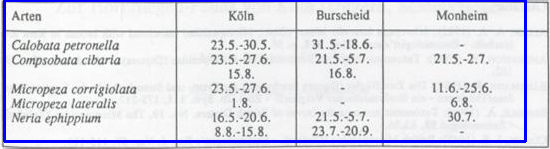

In [ ]:
table_detection.plot_prediction(deskewed_image, predictor)

TABLE 0 :


/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


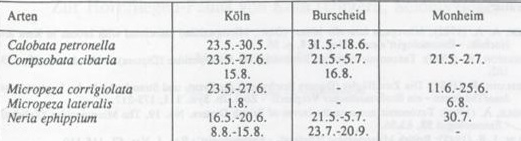

In [ ]:
table_list, table_coords = table_detection.make_prediction(deskewed_image, predictor)

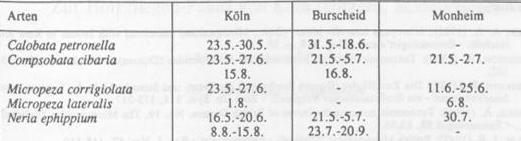

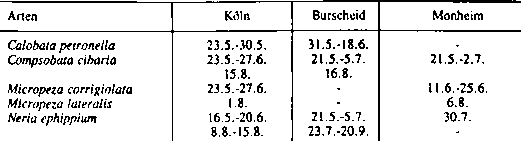

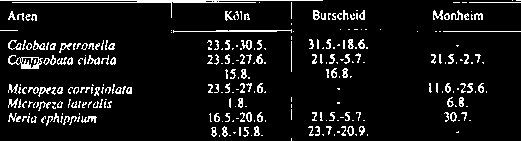

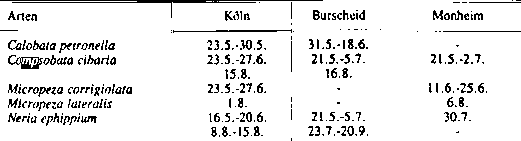

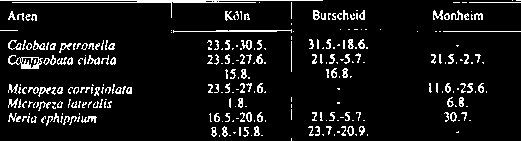

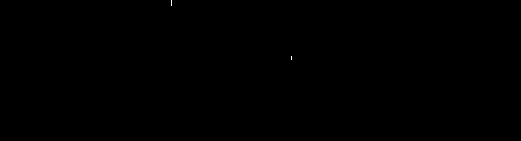

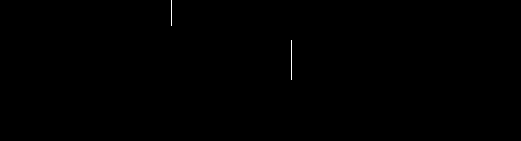

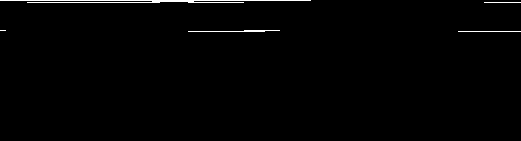

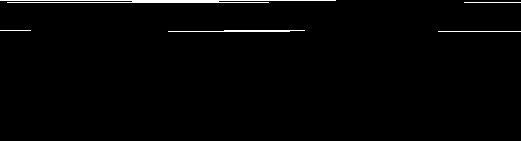

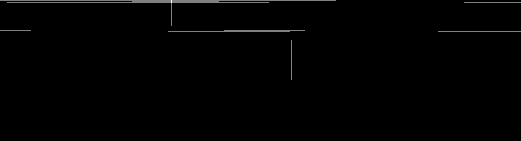

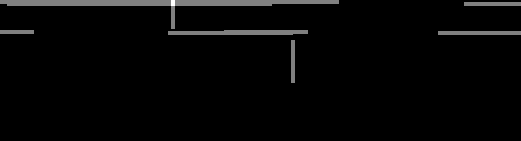

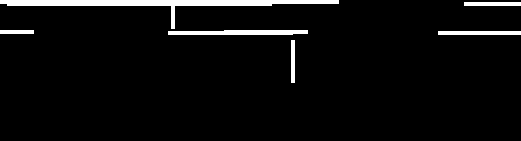

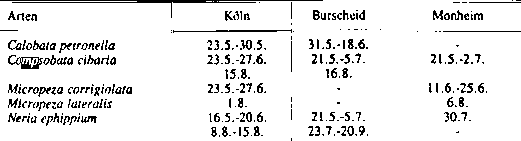

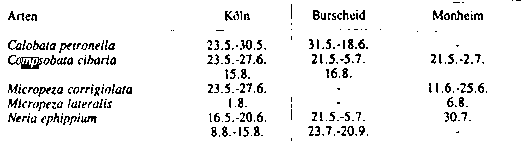

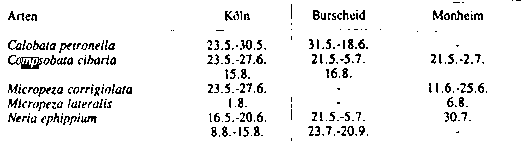

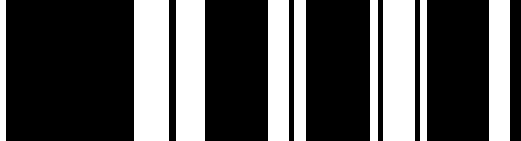

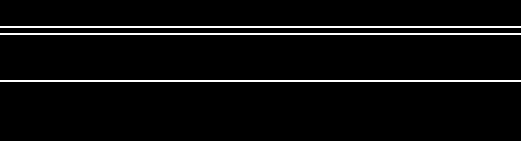

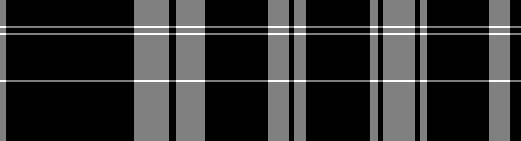

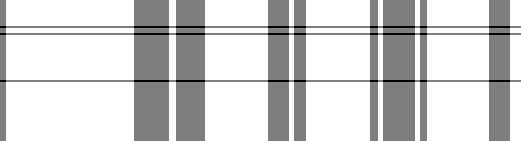

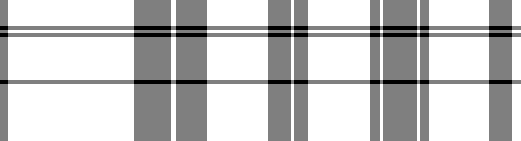

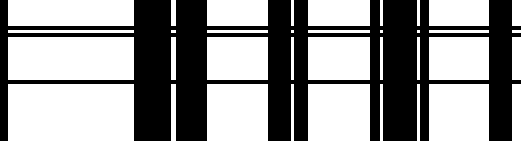

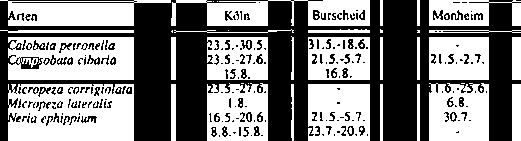

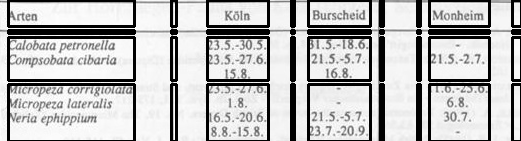

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!! ALL TYPES OF TABLES !!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsra.recognize_structure(table)
    list_table_boxes.append(finalboxes)

In [ ]:
tocr.output_to_csv(list_table_boxes[0], output_img)

                  0                                     1                     2
0           Average         operty Educational H-3h:\n\n               wer\n\n 
1             Price    \n\nmover Attaiamert = Cccussuoens       \n\nlal = Gwned
2              raid                                e ita)   Cupations = Mousing
3             irent                                                            
4   Universiry thal                        -bb% +4.6% AS%          “2.4%\n\n+2%
5              ae.t                                                            
6        Huntingdon                                                            
7      sureei SE.2%                         3.0%\n\n48.5%              Le\n\n  
8                                                                              


In [ ]:
txml.output_to_xml(table_coords, list_table_boxes)

(309, 1179, 3)
img_height 309 img_width 1179


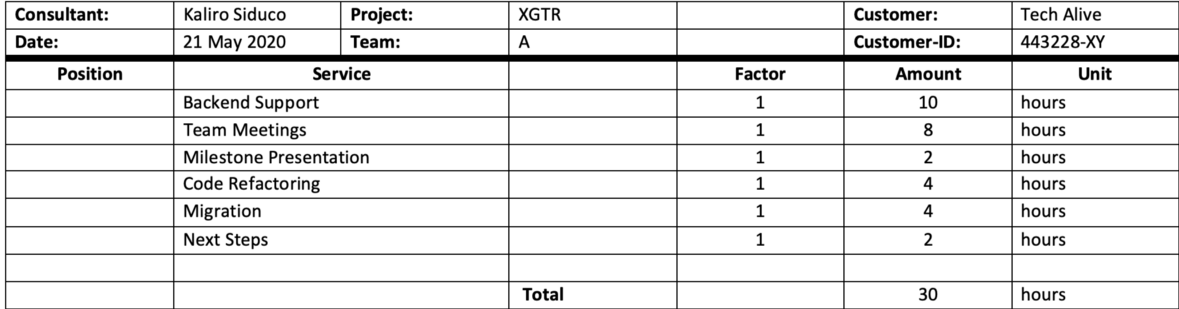

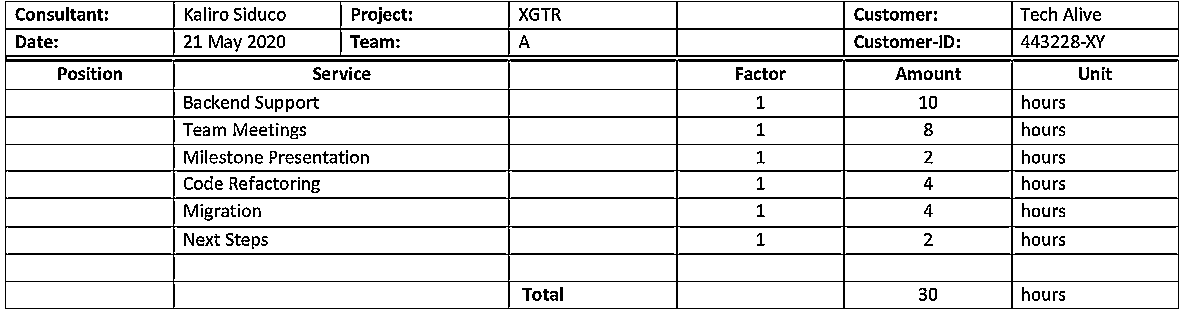

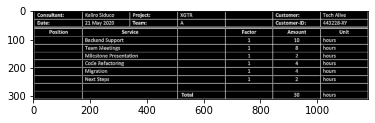

ver [[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
(6, 1)
hor [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(1, 23)
[[1 1]
 [1 1]]
(2, 2)


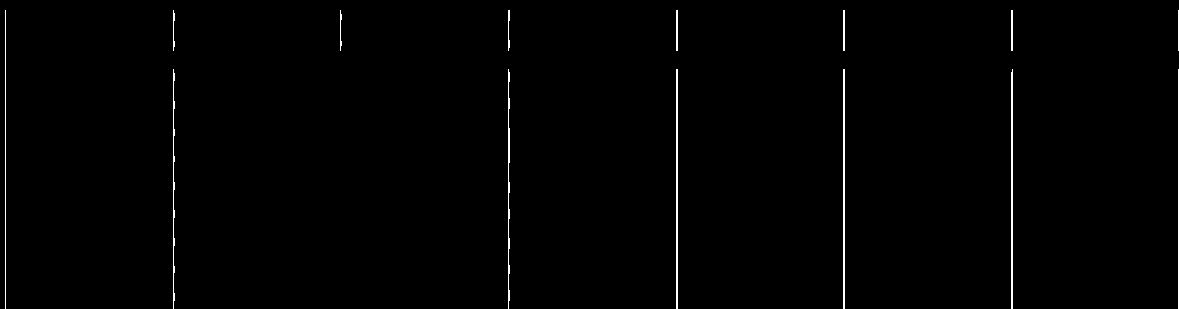

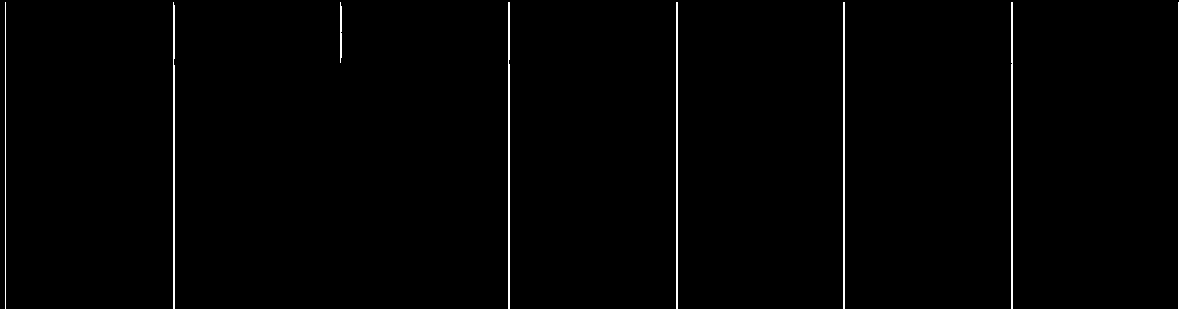

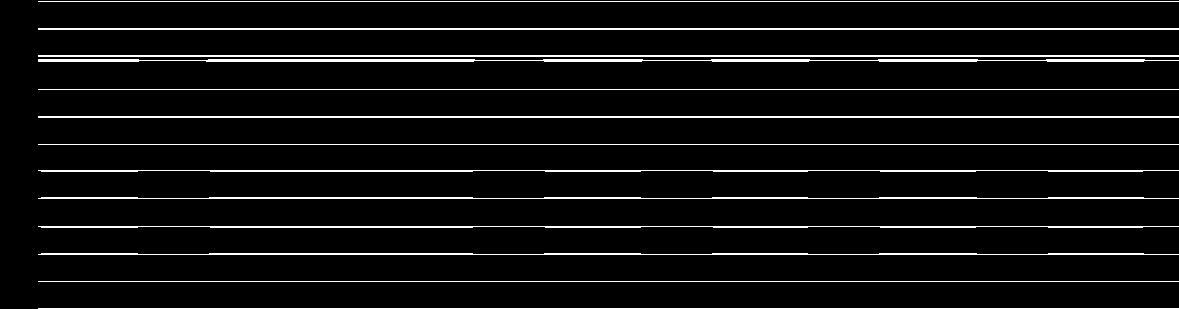

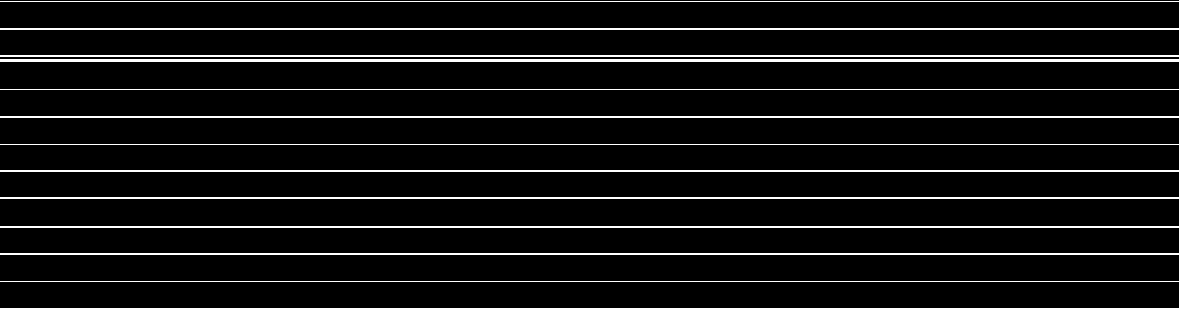

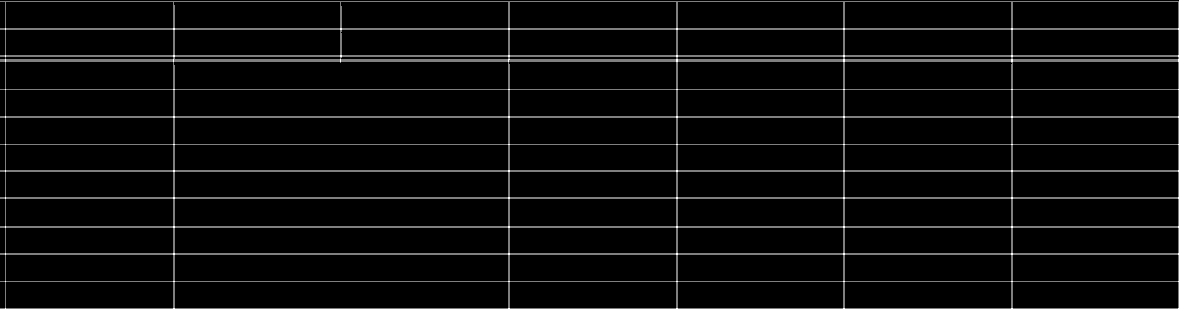

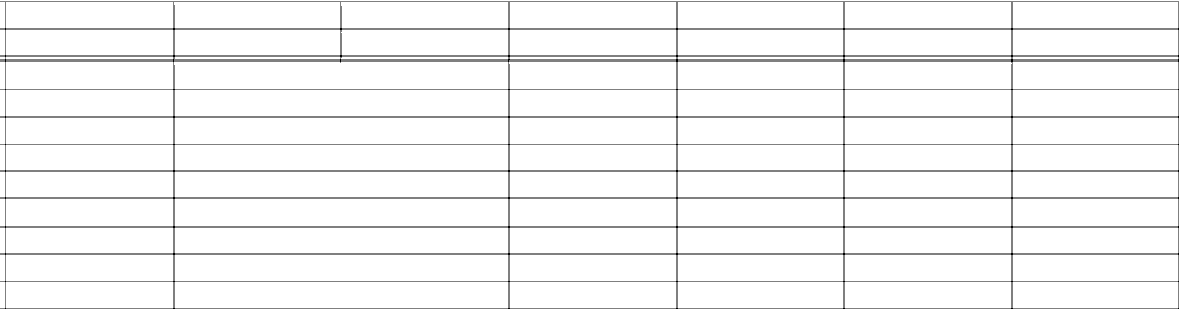

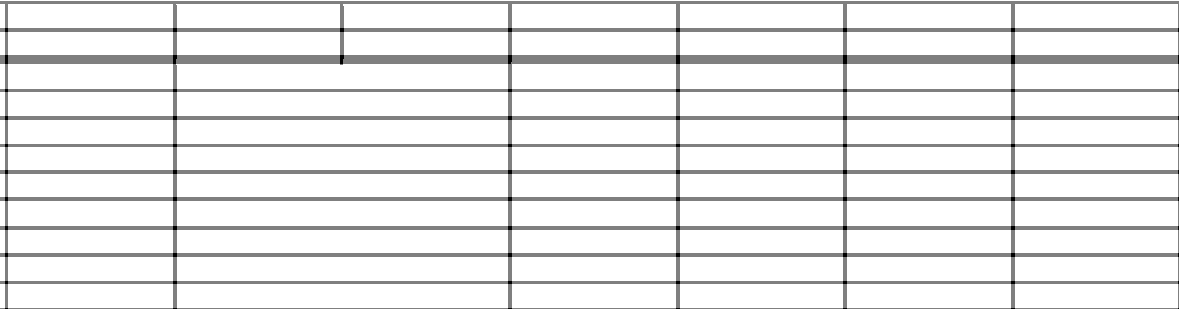

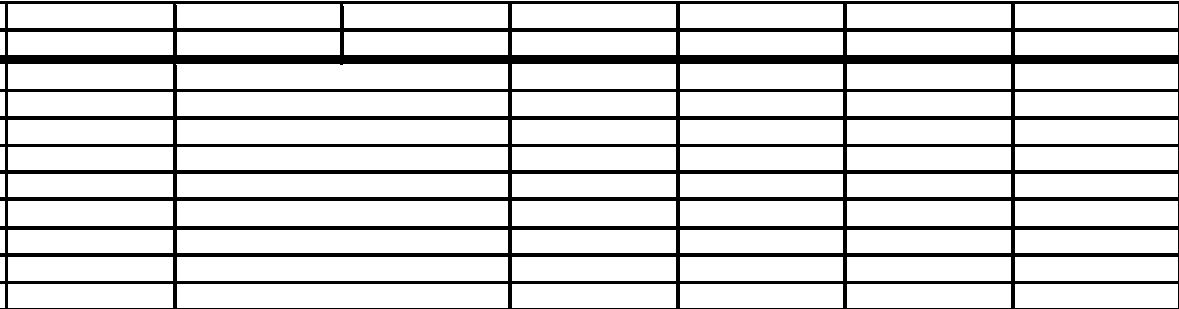

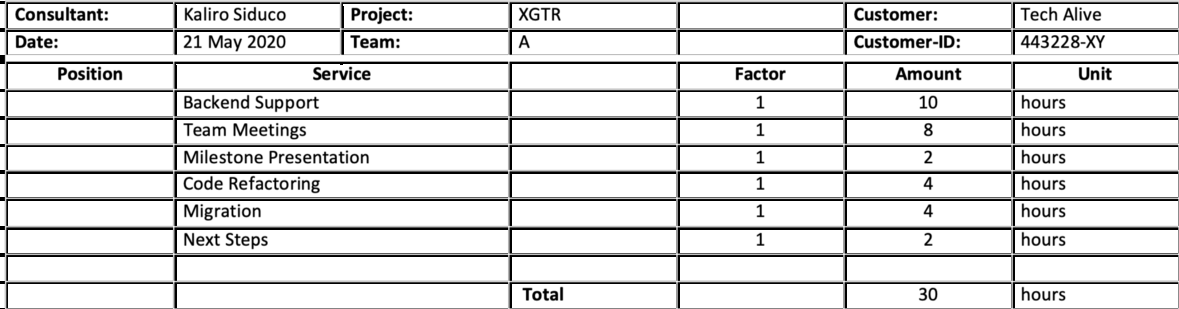

80
[[[1015  284]]

 [[1015  307]]

 [[1177  307]]

 [[1177  284]]]
4
(1015, 284, 163, 24)
lencontours 80
x 0 y 0 w 1179 h 1
x 1015 y 4 w 163 h 24
x 847 y 4 w 164 h 24
x 680 y 4 w 163 h 24
x 512 y 4 w 164 h 24
x 343 y 4 w 165 h 24
x 176 y 4 w 164 h 24
x 8 y 4 w 165 h 24
x 0 y 4 w 5 h 24
x 1015 y 32 w 163 h 23
x 847 y 32 w 164 h 23
x 680 y 32 w 163 h 23
x 512 y 32 w 164 h 23
x 344 y 32 w 164 h 23
x 177 y 32 w 163 h 23
x 8 y 32 w 165 h 23
x 0 y 32 w 5 h 23
x 1015 y 64 w 163 h 25
x 847 y 64 w 164 h 25
x 680 y 64 w 163 h 25
x 512 y 64 w 164 h 25
x 176 y 64 w 332 h 25
x 8 y 64 w 165 h 25
x 0 y 64 w 5 h 25
x 1015 y 92 w 163 h 24
x 847 y 92 w 164 h 24
x 680 y 92 w 163 h 24
x 512 y 92 w 164 h 24
x 177 y 92 w 331 h 24
x 8 y 92 w 165 h 24
x 0 y 92 w 5 h 24
x 1015 y 120 w 163 h 24
x 847 y 120 w 164 h 24
x 680 y 120 w 163 h 24
x 512 y 120 w 164 h 24
x 177 y 120 w 331 h 24
x 8 y 120 w 165 h 24
x 0 y 120 w 5 h 24
x 1015 y 147 w 163 h 23
x 847 y 147 w 164 h 23
x 680 y 147 w 163 h 23
x 512 y 147 w 164 

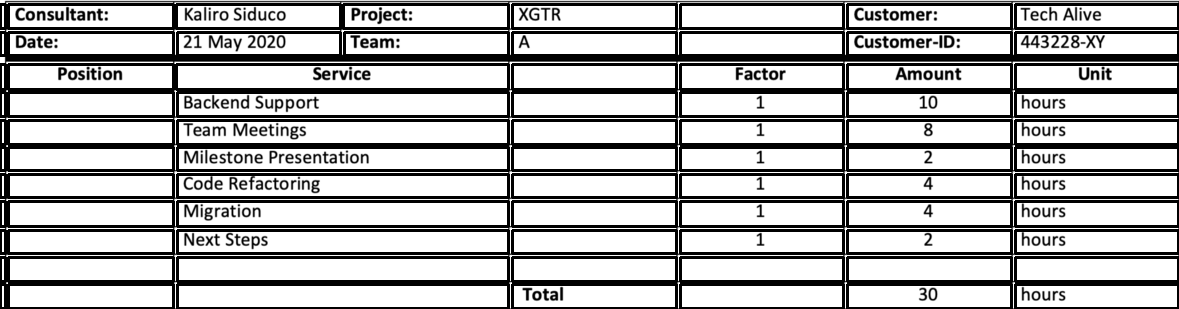

len box 79
[[1015, 284, 163, 24], [847, 284, 164, 24], [680, 284, 163, 24], [512, 284, 164, 24], [177, 284, 331, 24], [8, 284, 165, 24], [0, 284, 5, 24]]
[[[1015, 4, 163, 24], [847, 4, 164, 24], [680, 4, 163, 24], [512, 4, 164, 24], [343, 4, 165, 24], [176, 4, 164, 24], [8, 4, 165, 24], [0, 4, 5, 24]], [[1015, 32, 163, 23], [847, 32, 164, 23], [680, 32, 163, 23], [512, 32, 164, 23], [344, 32, 164, 23], [177, 32, 163, 23], [8, 32, 165, 23], [0, 32, 5, 23]], [[1015, 64, 163, 25], [847, 64, 164, 25], [680, 64, 163, 25], [512, 64, 164, 25], [176, 64, 332, 25], [8, 64, 165, 25], [0, 64, 5, 25]], [[1015, 92, 163, 24], [847, 92, 164, 24], [680, 92, 163, 24], [512, 92, 164, 24], [177, 92, 331, 24], [8, 92, 165, 24], [0, 92, 5, 24]], [[1015, 120, 163, 24], [847, 120, 164, 24], [680, 120, 163, 24], [512, 120, 164, 24], [177, 120, 331, 24], [8, 120, 165, 24], [0, 120, 5, 24]], [[1015, 147, 163, 23], [847, 147, 164, 23], [680, 147, 163, 23], [512, 147, 164, 23], [177, 147, 331, 23], [8, 147, 165, 

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!! TABLES WITH FULL LINES!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsrl.recognize_structure(table)
    list_table_boxes.append(finalboxes)

(636, 593, 3)
img_height 636 img_width 593


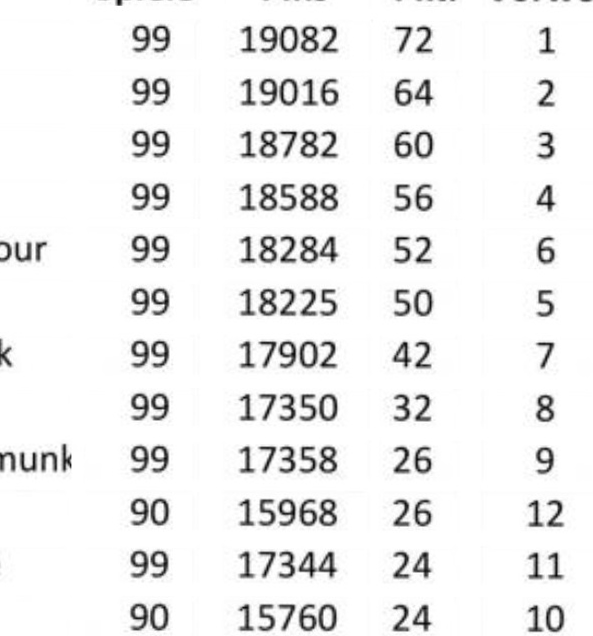

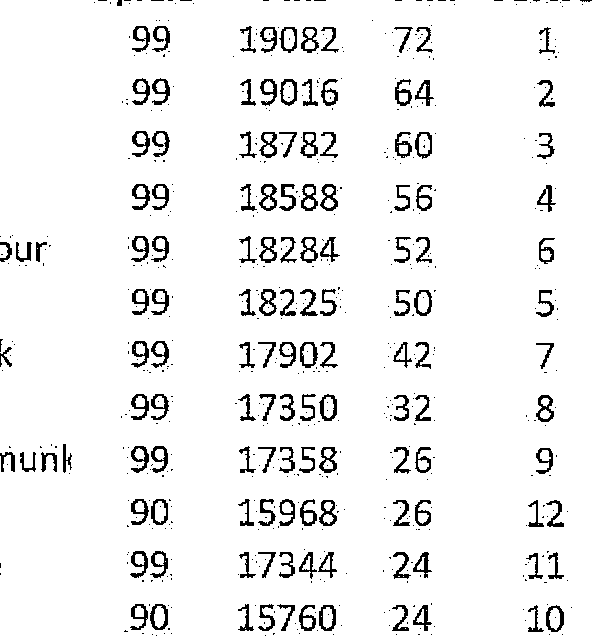

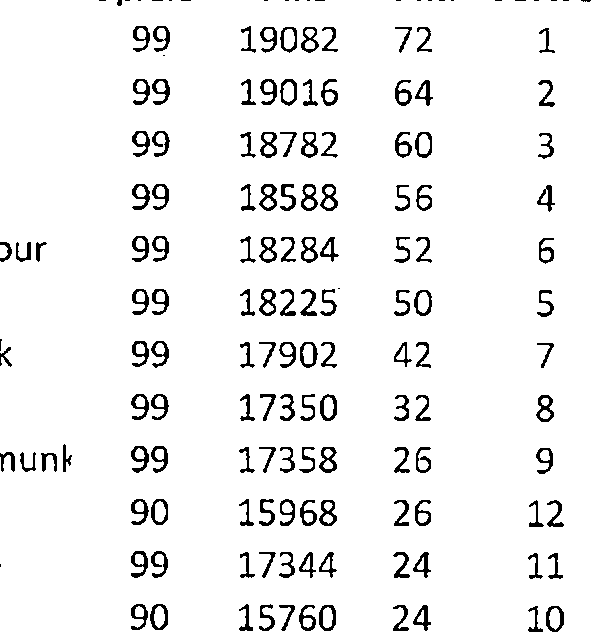

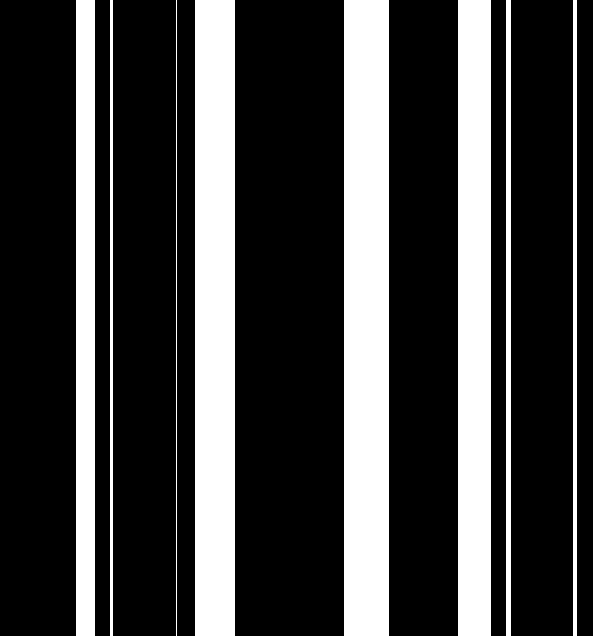

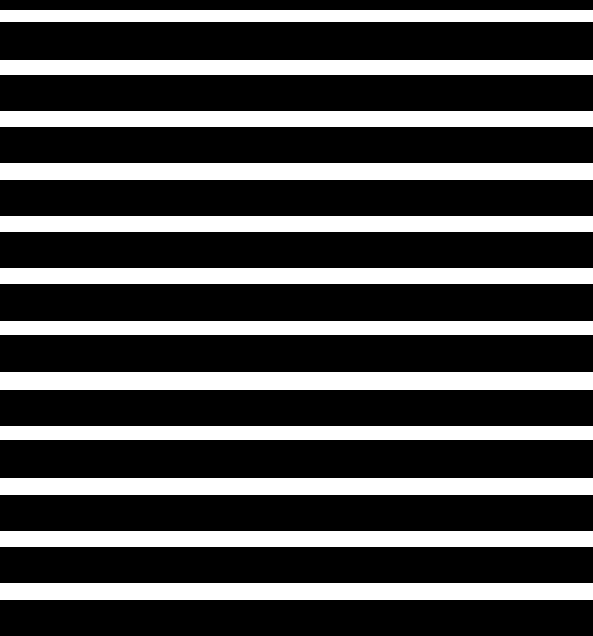

[[1 1]
 [1 1]]
(2, 2)


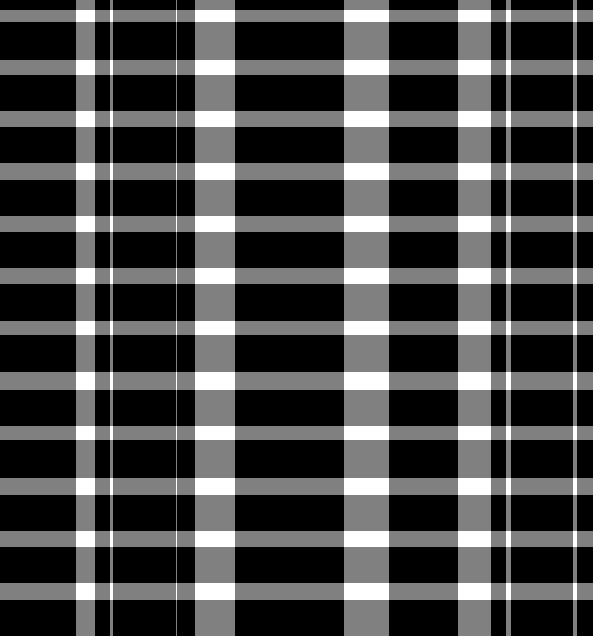

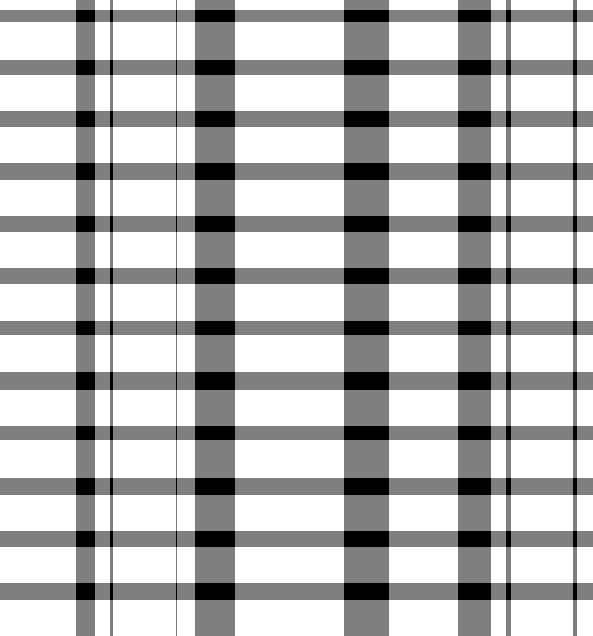

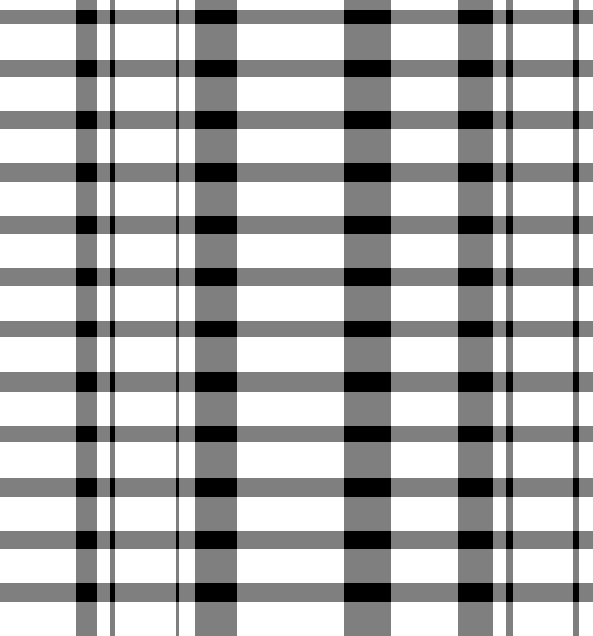

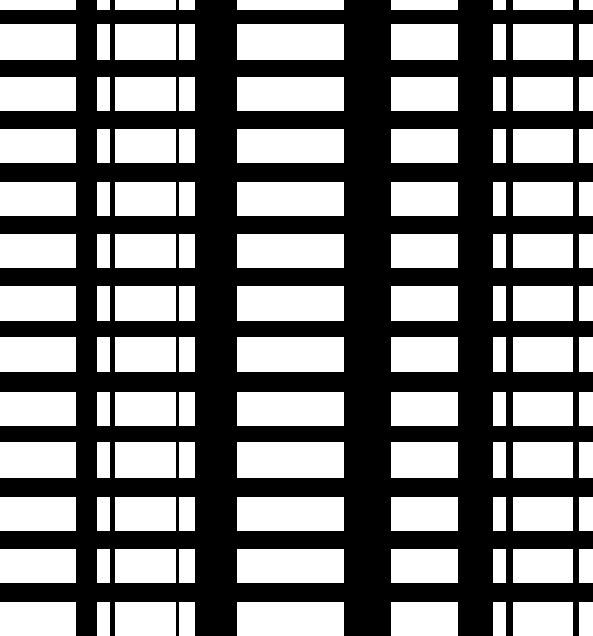

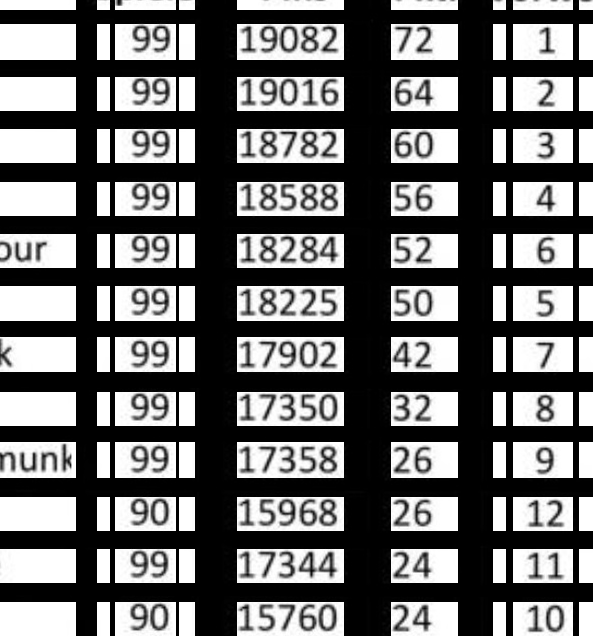

117
[[[579 602]]

 [[579 635]]

 [[592 635]]

 [[592 602]]]
4
(579, 602, 14, 34)
lencontours 117
x 579 y 0 w 14 h 10
x 513 y 0 w 60 h 10
x 493 y 0 w 13 h 10
x 391 y 0 w 67 h 10
x 237 y 0 w 107 h 10
x 179 y 0 w 16 h 10
x 115 y 0 w 61 h 10
x 97 y 0 w 13 h 10
x 0 y 0 w 76 h 10
x 579 y 24 w 14 h 36
x 513 y 24 w 60 h 36
x 493 y 24 w 13 h 36
x 391 y 24 w 67 h 36
x 237 y 24 w 107 h 36
x 179 y 24 w 16 h 36
x 115 y 24 w 61 h 36
x 97 y 24 w 13 h 36
x 0 y 24 w 76 h 36
x 579 y 77 w 14 h 34
x 513 y 77 w 60 h 34
x 493 y 77 w 13 h 34
x 391 y 77 w 67 h 34
x 237 y 77 w 107 h 34
x 179 y 77 w 16 h 34
x 115 y 77 w 61 h 34
x 97 y 77 w 13 h 34
x 0 y 77 w 76 h 34
x 579 y 129 w 14 h 34
x 513 y 129 w 60 h 34
x 493 y 129 w 13 h 34
x 391 y 129 w 67 h 34
x 237 y 129 w 107 h 34
x 179 y 129 w 16 h 34
x 115 y 129 w 61 h 34
x 97 y 129 w 13 h 34
x 0 y 129 w 76 h 34
x 579 y 182 w 14 h 34
x 513 y 182 w 60 h 34
x 493 y 182 w 13 h 34
x 391 y 182 w 67 h 34
x 237 y 182 w 107 h 34
x 179 y 182 w 16 h 34
x 115 y 182 w 61 h 34


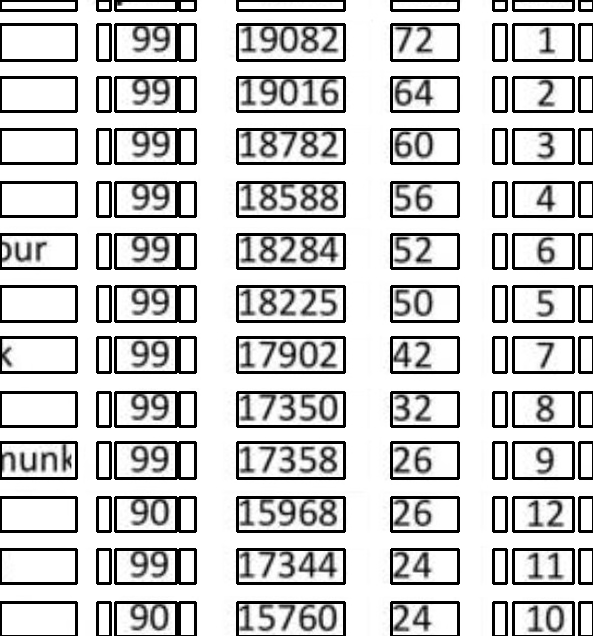

len box 117
[[579, 602, 14, 34], [513, 602, 60, 34], [493, 602, 13, 34], [391, 602, 67, 34], [237, 602, 107, 34], [179, 602, 16, 34], [115, 602, 61, 34], [97, 602, 13, 34], [0, 602, 76, 34]]
[[[579, 0, 14, 10], [513, 0, 60, 10], [493, 0, 13, 10], [391, 0, 67, 10], [237, 0, 107, 10], [179, 0, 16, 10], [115, 0, 61, 10], [97, 0, 13, 10], [0, 0, 76, 10]], [[579, 24, 14, 36], [513, 24, 60, 36], [493, 24, 13, 36], [391, 24, 67, 36], [237, 24, 107, 36], [179, 24, 16, 36], [115, 24, 61, 36], [97, 24, 13, 36], [0, 24, 76, 36]], [[579, 77, 14, 34], [513, 77, 60, 34], [493, 77, 13, 34], [391, 77, 67, 34], [237, 77, 107, 34], [179, 77, 16, 34], [115, 77, 61, 34], [97, 77, 13, 34], [0, 77, 76, 34]], [[579, 129, 14, 34], [513, 129, 60, 34], [493, 129, 13, 34], [391, 129, 67, 34], [237, 129, 107, 34], [179, 129, 16, 34], [115, 129, 61, 34], [97, 129, 13, 34], [0, 129, 76, 34]], [[579, 182, 14, 34], [513, 182, 60, 34], [493, 182, 13, 34], [391, 182, 67, 34], [237, 182, 107, 34], [179, 182, 16, 34], [1

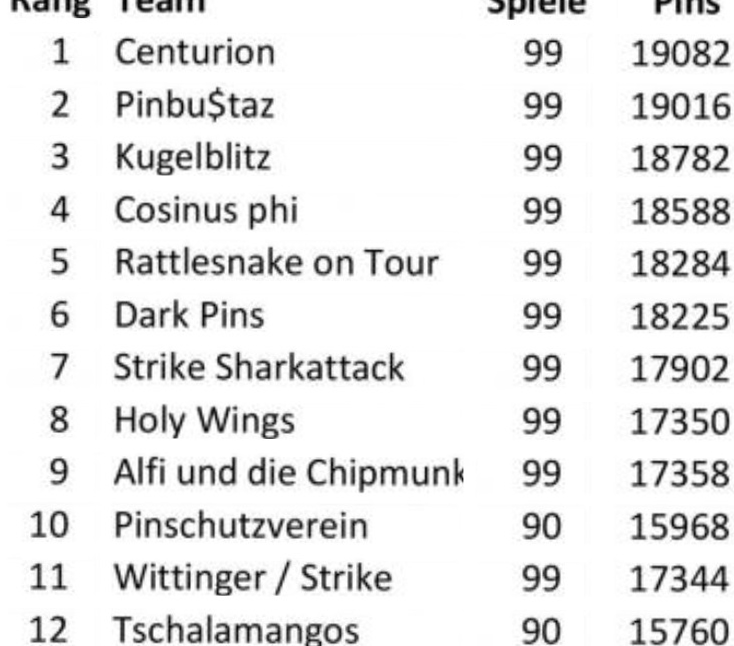

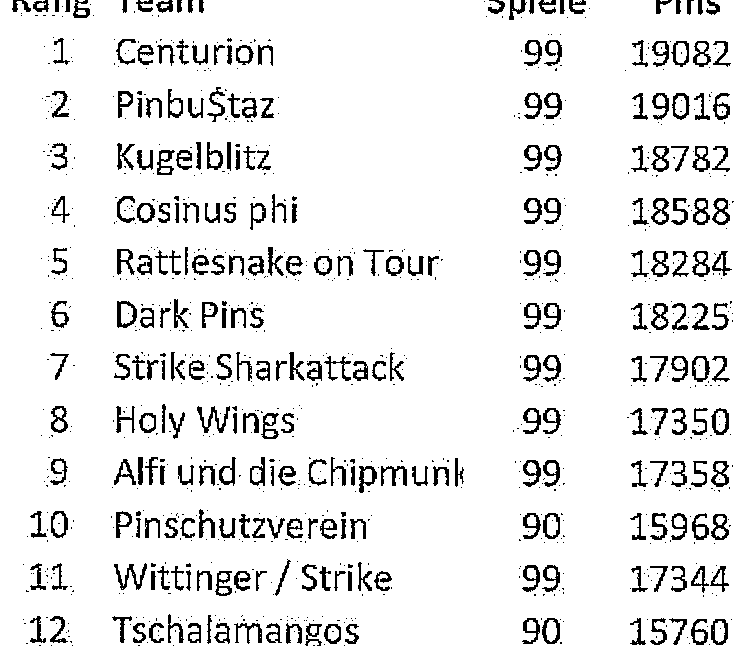

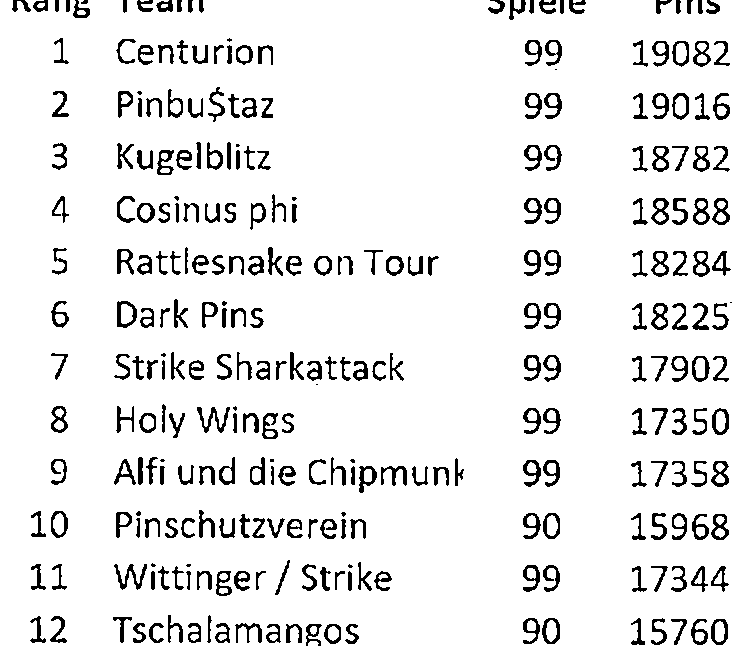

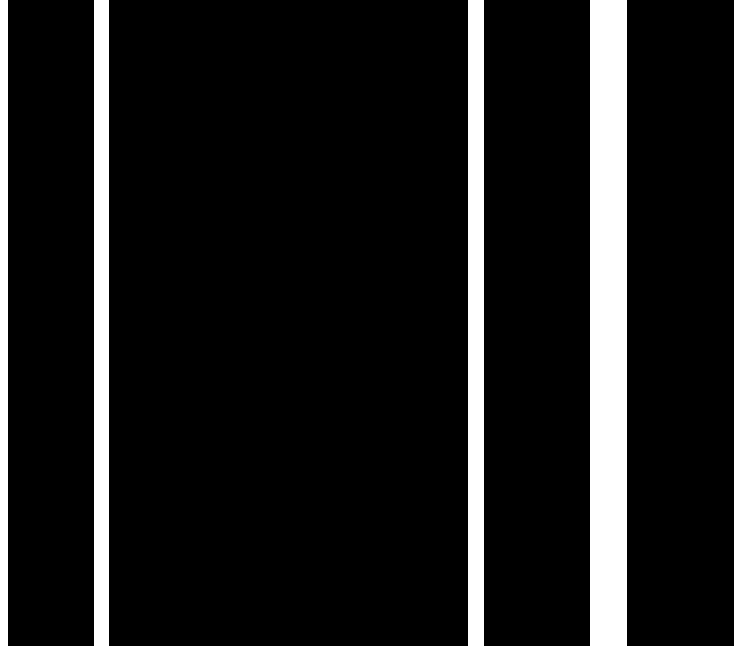

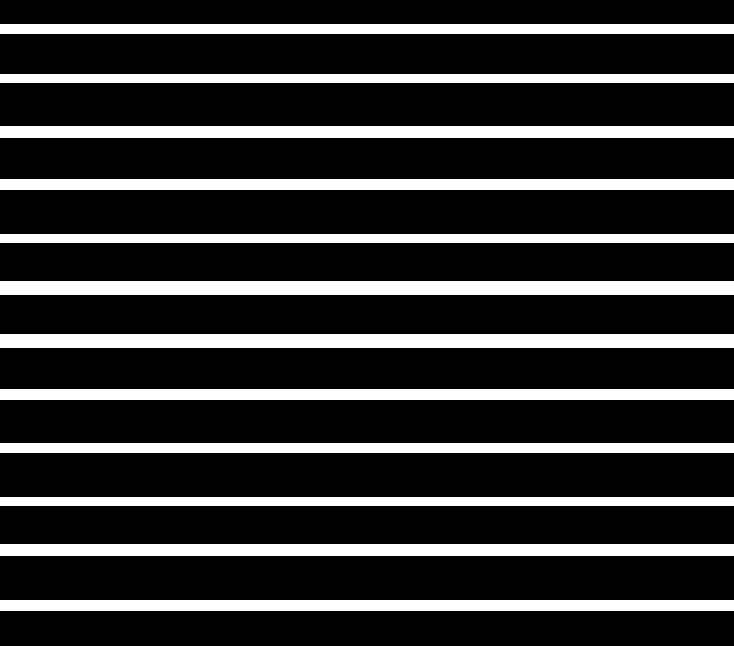

[[1 1]
 [1 1]]
(2, 2)


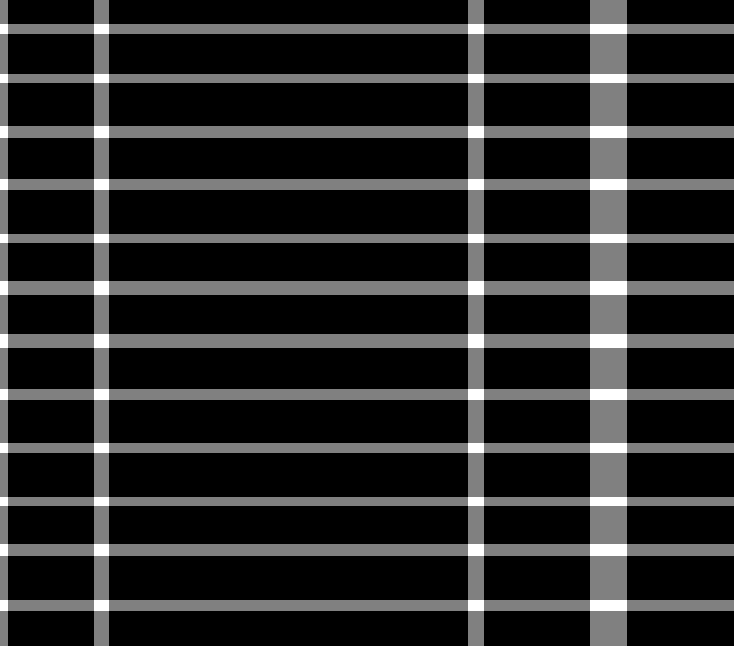

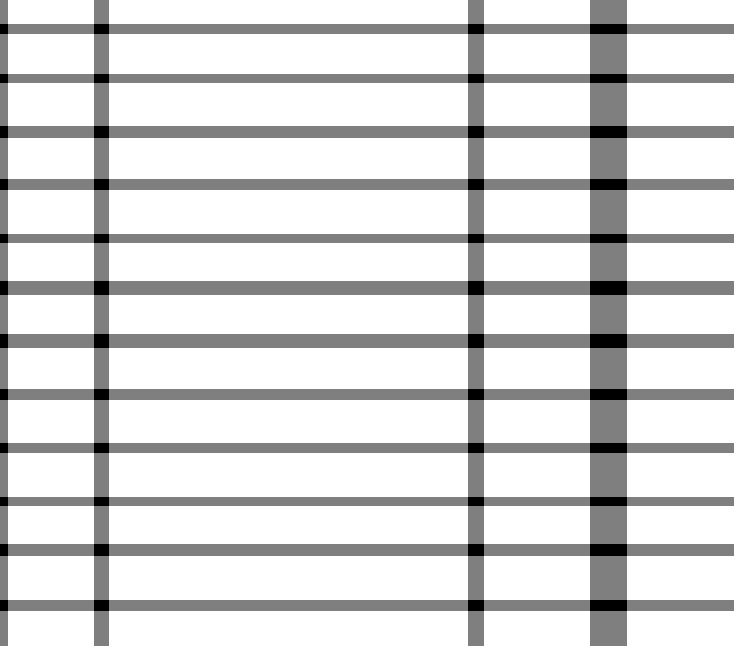

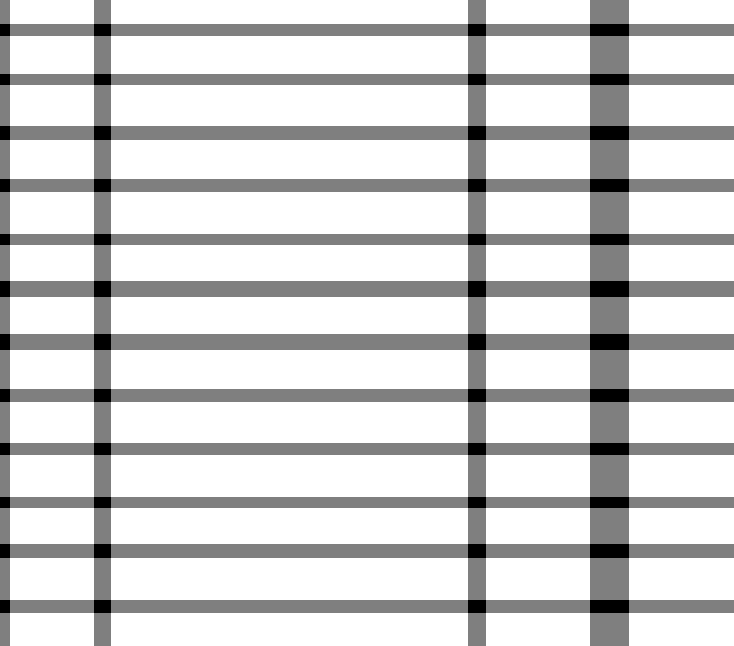

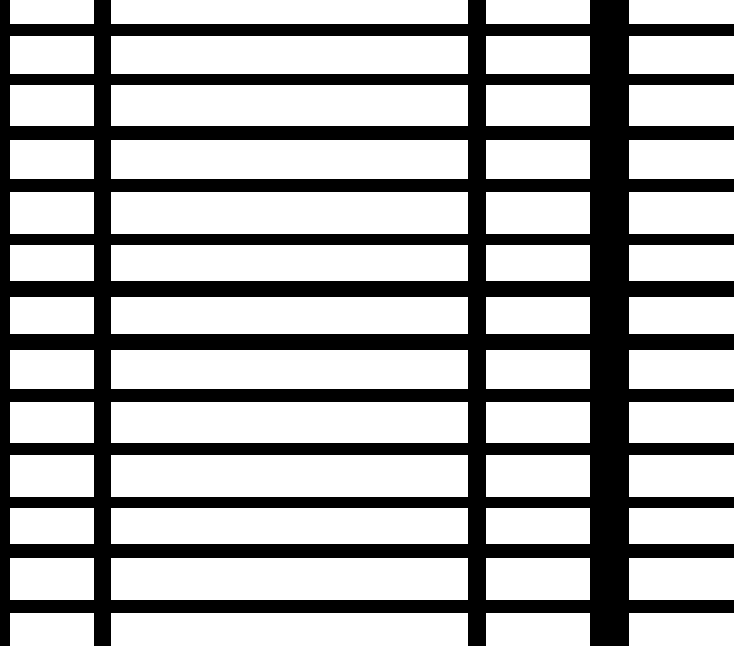

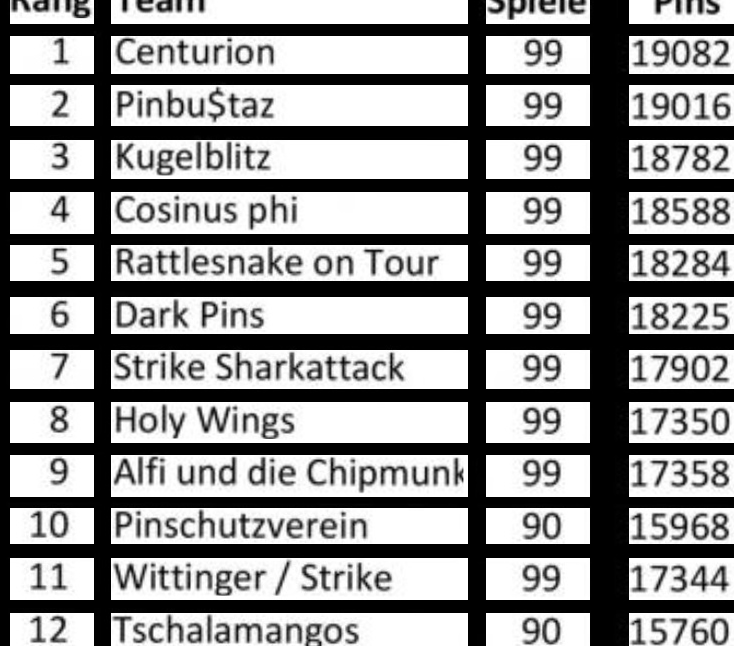

52
[[[629 613]]

 [[629 645]]

 [[733 645]]

 [[733 613]]]
4
(629, 613, 105, 33)
lencontours 52
x 629 y 0 w 105 h 24
x 486 y 0 w 104 h 24
x 111 y 0 w 357 h 24
x 10 y 0 w 84 h 24
x 629 y 36 w 105 h 38
x 486 y 36 w 104 h 38
x 111 y 36 w 357 h 38
x 10 y 36 w 84 h 38
x 629 y 85 w 105 h 41
x 486 y 85 w 104 h 41
x 111 y 85 w 357 h 41
x 10 y 85 w 84 h 41
x 629 y 140 w 105 h 39
x 486 y 140 w 104 h 39
x 111 y 140 w 357 h 39
x 10 y 140 w 84 h 39
x 629 y 192 w 105 h 42
x 486 y 192 w 104 h 42
x 111 y 192 w 357 h 42
x 10 y 192 w 84 h 42
x 629 y 245 w 105 h 36
x 486 y 245 w 104 h 36
x 111 y 245 w 357 h 36
x 10 y 245 w 84 h 36
x 629 y 297 w 105 h 37
x 486 y 297 w 104 h 37
x 111 y 297 w 357 h 37
x 10 y 297 w 84 h 37
x 629 y 350 w 105 h 39
x 486 y 350 w 104 h 39
x 111 y 350 w 357 h 39
x 10 y 350 w 84 h 39
x 629 y 402 w 105 h 41
x 486 y 402 w 104 h 41
x 111 y 402 w 357 h 41
x 10 y 402 w 84 h 41
x 629 y 455 w 105 h 42
x 486 y 455 w 104 h 42
x 111 y 455 w 357 h 42
x 10 y 455 w 84 h 42
x 629 y 508 w 105 h 

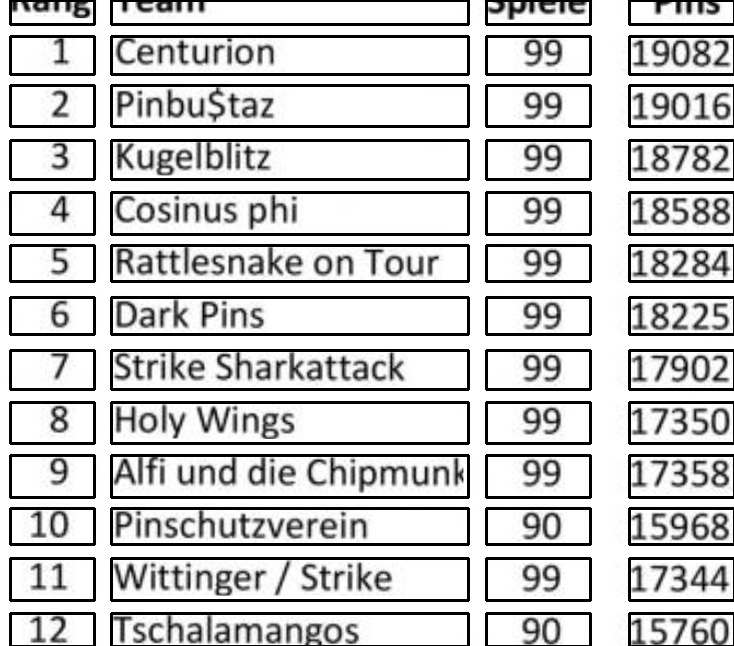

len box 52
[[629, 613, 105, 33], [486, 613, 104, 33], [111, 613, 357, 33], [10, 613, 84, 33]]
[[[629, 0, 105, 24], [486, 0, 104, 24], [111, 0, 357, 24], [10, 0, 84, 24]], [[629, 36, 105, 38], [486, 36, 104, 38], [111, 36, 357, 38], [10, 36, 84, 38]], [[629, 85, 105, 41], [486, 85, 104, 41], [111, 85, 357, 41], [10, 85, 84, 41]], [[629, 140, 105, 39], [486, 140, 104, 39], [111, 140, 357, 39], [10, 140, 84, 39]], [[629, 192, 105, 42], [486, 192, 104, 42], [111, 192, 357, 42], [10, 192, 84, 42]], [[629, 245, 105, 36], [486, 245, 104, 36], [111, 245, 357, 36], [10, 245, 84, 36]], [[629, 297, 105, 37], [486, 297, 104, 37], [111, 297, 357, 37], [10, 297, 84, 37]], [[629, 350, 105, 39], [486, 350, 104, 39], [111, 350, 357, 39], [10, 350, 84, 39]], [[629, 402, 105, 41], [486, 402, 104, 41], [111, 402, 357, 41], [10, 402, 84, 41]], [[629, 455, 105, 42], [486, 455, 104, 42], [111, 455, 357, 42], [10, 455, 84, 42]], [[629, 508, 105, 36], [486, 508, 104, 36], [111, 508, 357, 36], [10, 508, 84, 36]

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!! TABLES WITHOUT LINES!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsrwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

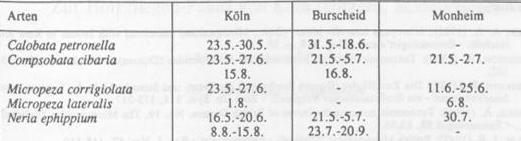

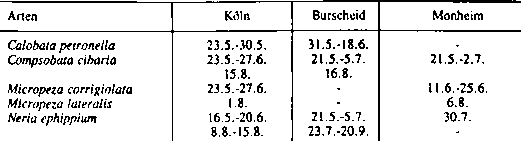

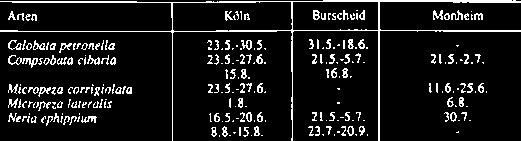

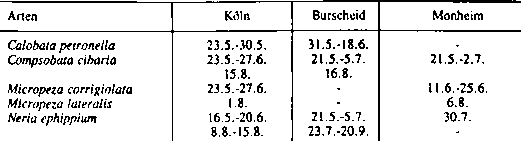

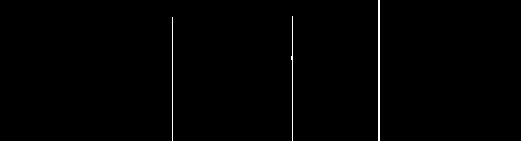

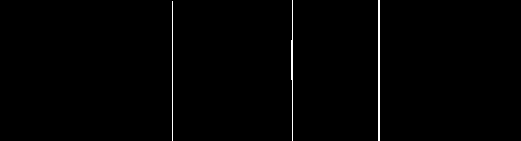

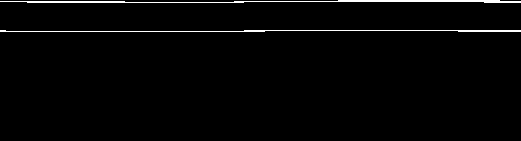

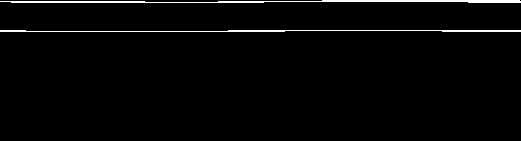

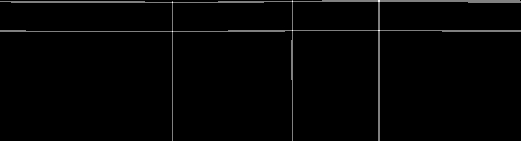

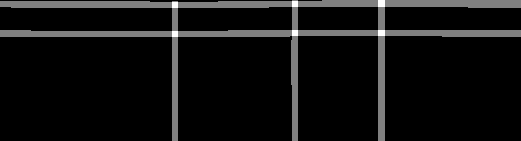

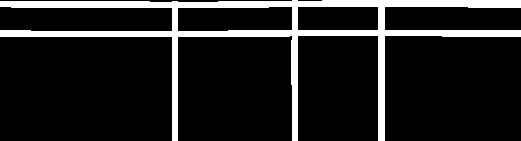

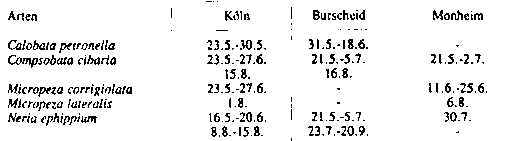

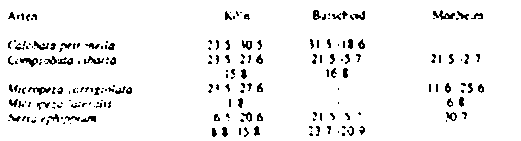

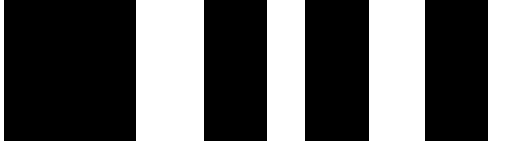

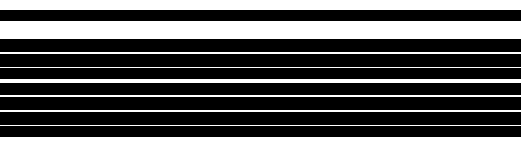

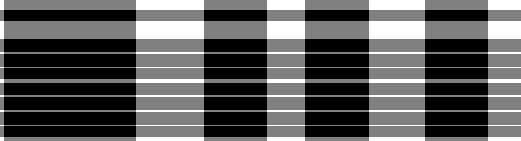

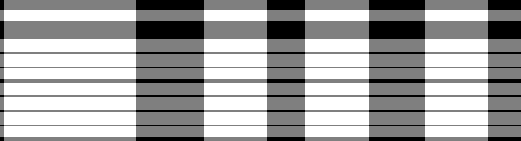

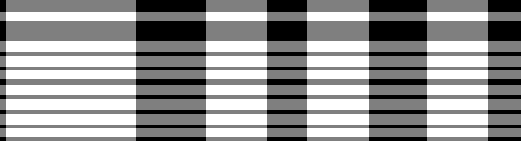

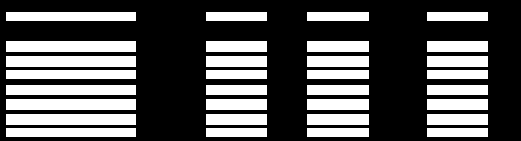

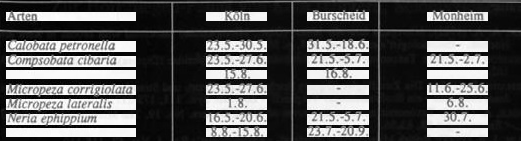

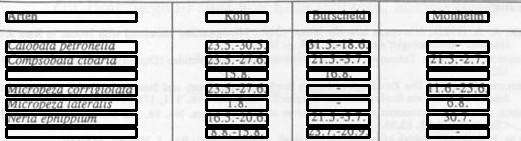

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!TABLES WITH LINES AND WITHOUT!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsrlwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)